In [1]:
import numpy as np
import pandas as pd
import my_equations
from numpy import vectorize
import matplotlib.pyplot as plt

In [45]:
A_df = pd.read_csv("Results Dataframes/A_dz.csv",header=None).iloc[1:,1:]
Rb_df = pd.read_csv("Results Dataframes/Rb_dz.csv",header=None).iloc[1:,1:]
Rd_df = pd.read_csv("Results Dataframes/Rd_dz.csv",header=None).iloc[1:,1:]

A = A_df.to_numpy()
Rb = Rb_df.to_numpy()
Rd = Rd_df.to_numpy()

dz=0.1
zmax = int(A.shape[0]*dz)
z_grid = np.arange(0,zmax,dz)

tmax = 300
dmax = 10
dmin = 0.1
dstep = 0.5
drange=dmax-dmin
d_vals=np.arange(dmin,dmax,dstep)
Nd = len(d_vals)

In [4]:
help(my_equations.I)

Help on function I in module my_equations:

I(z, A, I_0=300, k=0.0003, dz=0.1)
    Function to plot I using array A[:,i], default k=0.0003, larger values of k make effect of A on I more apparent



In [40]:
I_df = A_df.apply(lambda x : my_equations.I(z_grid,x), axis=0)
I = I_df.to_numpy()

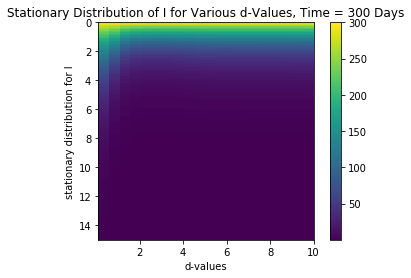

In [46]:
# Heatmap
plt.imshow(I[:,:],aspect=dmax/zmax,origin="lower",extent=(dmin,dmax,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for I')
plt.title('Stationary Distribution of I for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

In [47]:
help(my_equations.p)

Help on function p in module my_equations:

p(I, q)
    Specific algal production (growth) rate



In [72]:
q_df = Rb_df.divide(A)
q = q_df.to_numpy()

In [55]:
pvec = vectorize(my_equations.p)
p_df = pd.DataFrame(pvec(I_df, q_df), columns=I_df.columns, index=I_df.index)
p = p_df.to_numpy()

In [75]:
help(my_equations.rho)

Help on function rho in module my_equations:

rho(q, Rd)
    Specific algal uptake ("feeding") rate



In [77]:
rhovec = vectorize(my_equations.rho)
rho_df = pd.DataFrame(rhovec(q_df, Rd_df), columns=q_df.columns, index=q_df.index)
rho = rho_df.to_numpy()

<IPython.core.display.Javascript object>


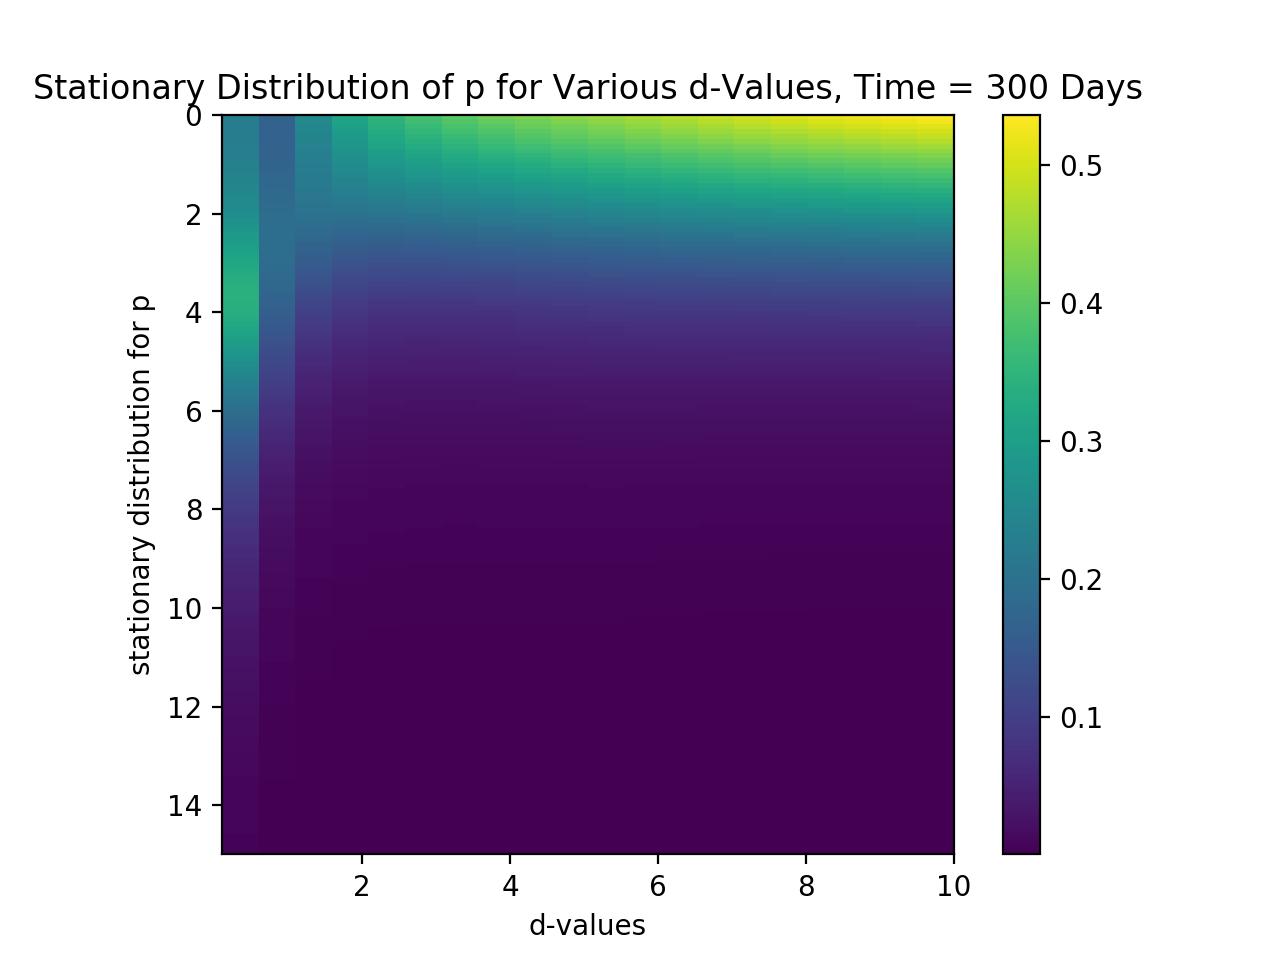

In [64]:
%matplotlib notebook
# Heatmap
plt.imshow(p[:,:],aspect=dmax/zmax,origin="lower",extent=(dmin,dmax,0,zmax),cmap='viridis')
plt.xlabel('d-values')
plt.ylabel('stationary distribution for p')
plt.title('Stationary Distribution of p for Various d-Values, time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

<IPython.core.display.Javascript object>


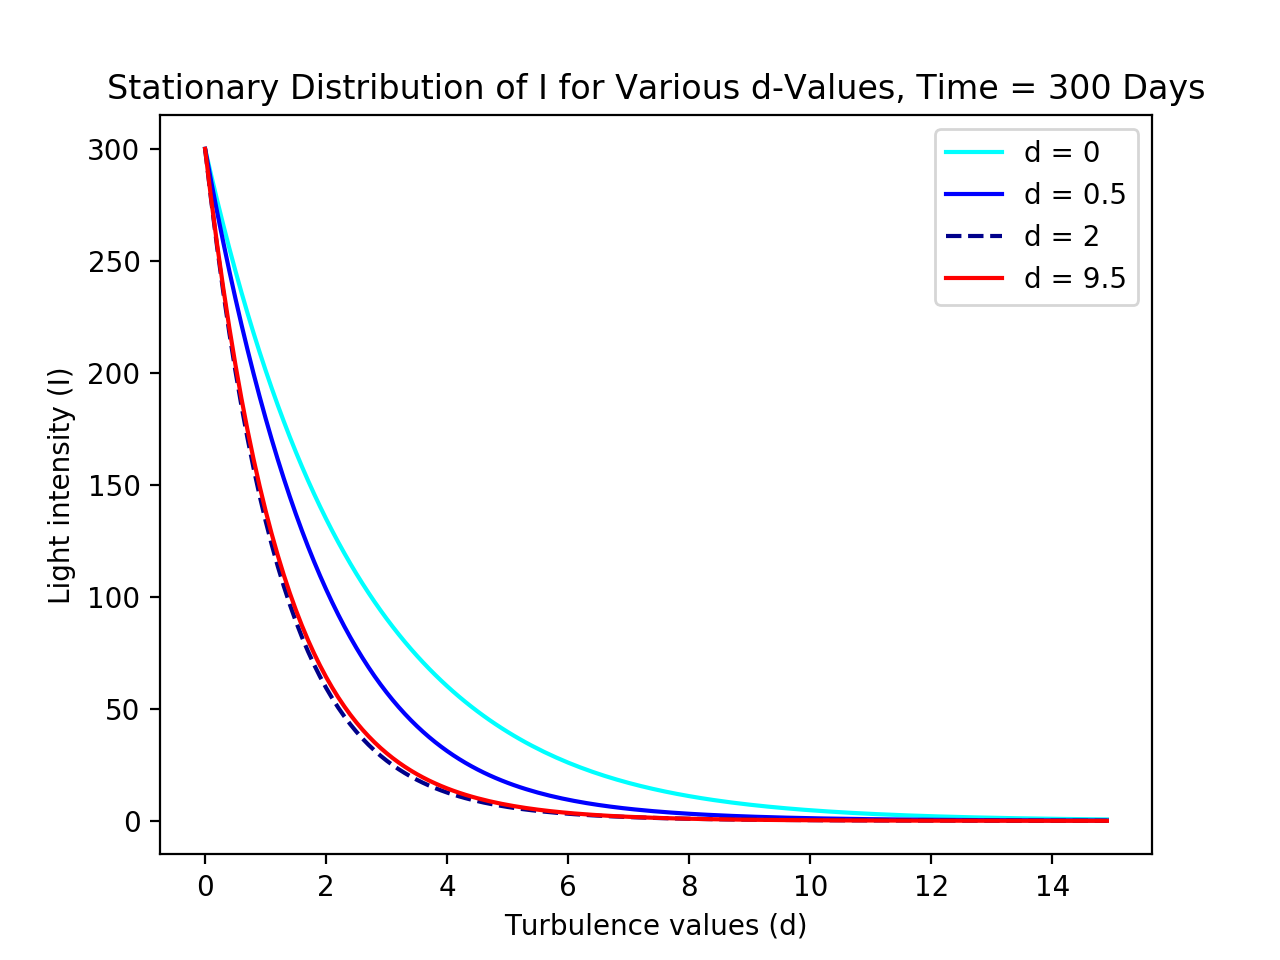

Text(0.5, 1.0, 'Stationary Distribution of I for Various d-Values, Time = 300 Days')

In [74]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,I[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,I[:,int(second/dstep)],color='blue')
plt.plot(z_grid,I[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,I[:,int(fourth/dstep)],color='red')
plt.ylabel('Light intensity (I)')
plt.xlabel('Turbulence values (d)')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of I for Various d-Values, Time = {} Days'.format(tmax))





<IPython.core.display.Javascript object>


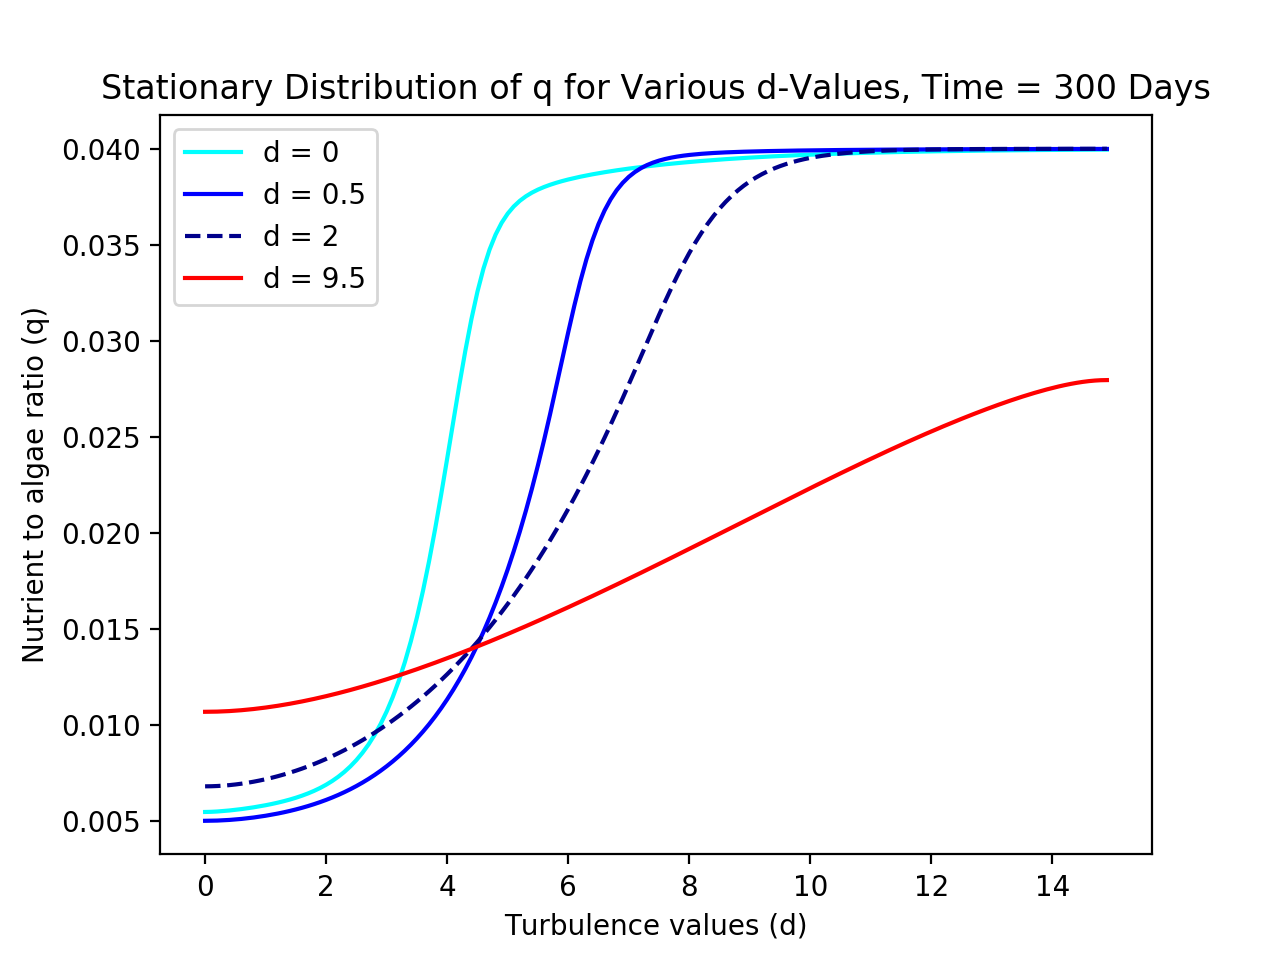

Text(0.5, 1.0, 'Stationary Distribution of q for Various d-Values, Time = 300 Days')

In [73]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,q[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,q[:,int(second/dstep)],color='blue')
plt.plot(z_grid,q[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,q[:,int(fourth/dstep)],color='red')
plt.ylabel('Nutrient to algae ratio (q)')
plt.xlabel('Turbulence values (d)')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of q for Various d-Values, Time = {} Days'.format(tmax))




<IPython.core.display.Javascript object>


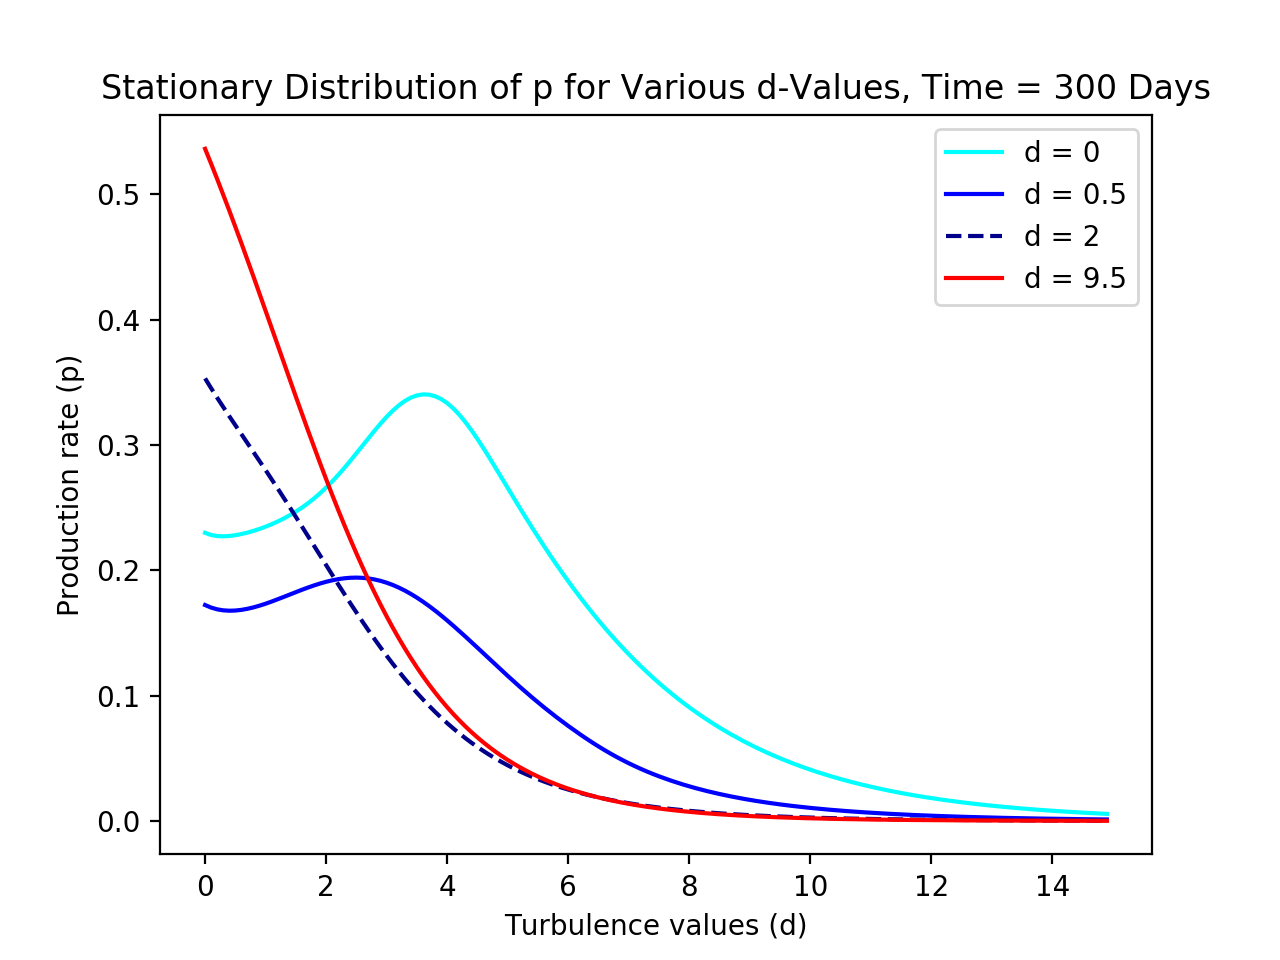

Text(0.5, 1.0, 'Stationary Distribution of p for Various d-Values, Time = 300 Days')

In [71]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,p[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,p[:,int(second/dstep)],color='blue')
plt.plot(z_grid,p[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,p[:,int(fourth/dstep)],color='red')
plt.ylabel('Production rate (p)')
plt.xlabel('Turbulence values (d)')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of p for Various d-Values, Time = {} Days'.format(tmax))



<IPython.core.display.Javascript object>


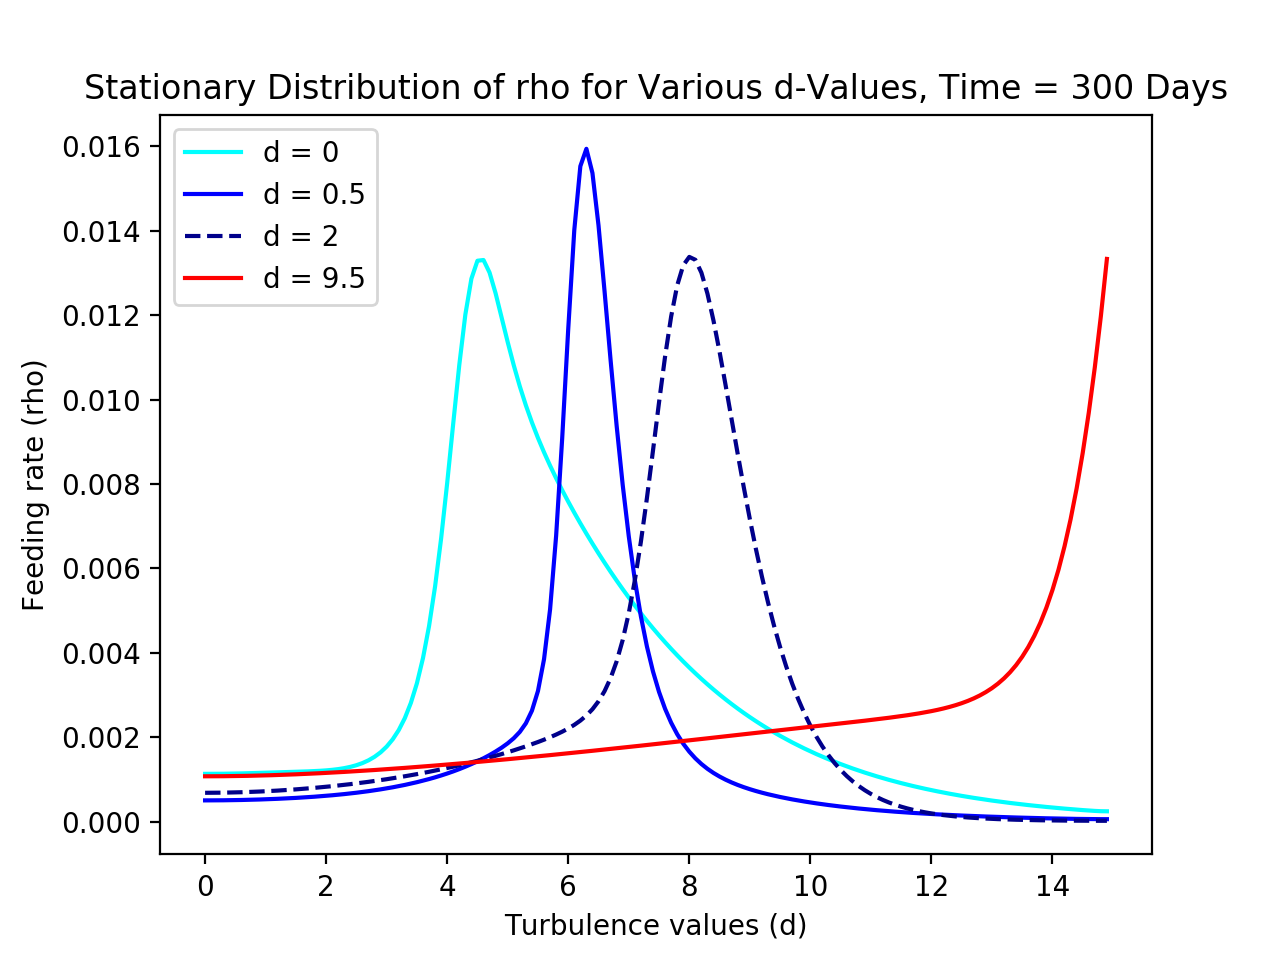

Text(0.5, 1.0, 'Stationary Distribution of rho for Various d-Values, Time = 300 Days')

In [78]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,rho[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,rho[:,int(second/dstep)],color='blue')
plt.plot(z_grid,rho[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,rho[:,int(fourth/dstep)],color='red')
plt.ylabel('Feeding rate (rho)')
plt.xlabel('Turbulence values (d)')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of rho for Various d-Values, Time = {} Days'.format(tmax))




In [84]:
h=

NameError: name 'h' is not defined